# Introduction to Pandas

**Pandas** is a python library that has been created by **Wes McKinney** in 2007 on top of the **Numpy** library, and had become open sourced by the end of 2009. It is widely used in data science, machine learning and data analysis tasks. The name is derived from the term **"PANel DAta"** (tabular data), an econometrics term for data sets that include observations over multiple time periods for the same individuals. ([wikipedia](https://en.wikipedia.org/wiki/Pandas_(software)))

**Pandas** works well together with other librairies such as **Matplotlib / Seaborn** and, of course, **Numpy**.

<img src="files/pandas_numpy_matplotlib_seaborn.png" width="100%" align="center">

In [ ]:
import pandas as pd # We'll use pd as the alias
import numpy as np # and np as alias for numpy

# DataFrame

A Pandas DataFrame is a two-dimensional, size-mutable, and highly flexible data structure for data manipulation and analysis in Python. The DataFrame is often compared to a spreadsheet or a SQL table, as it organizes data into rows and columns, making it easy to work with structured data.

Key characteristics of a Pandas DataFrame:

- **Two-Dimensional**: A DataFrame consists of rows and columns, much like a table in a relational database or an Excel spreadsheet.

- **Size-Mutable**: You can add or remove rows and columns from a DataFrame, making it adaptable to changing data.

- **Labeled Axes**: Both rows and columns have labels (index and column names), allowing for easy identification and indexing of data.

- **Mixed Data Types**: A DataFrame can contain data of different types (e.g., integers, floats, strings) in different columns, or inside the same column.

- **Missing Data Handling**: DataFrames can handle missing or NaN (Not-a-Number) values gracefully, providing tools for detecting, removing, or imputing missing data.

- **Operations**: DataFrames support a wide range of data operations, including filtering, grouping, aggregation, pivoting, merging, and more.

## Creating a DataFrame

Pandas can create DataFrames from many differents file formats including :

- CSV (comma separated value)
- Excel (XLS and XLSX)
- JSON (Java Script Object Notation)
- HTML (Tables)
- SQL (Databases)
- Parquet
- HDF5 (Hierarchical Data Format)
- Feather
- Stata
- SAS
- Google BigQuery
- Clipboard
- Python Dictionnaries
- URLs (HTTP, FTP, etc.)
- ... And many more

## Fake dataset

Let's create a DataFrame from a CSV file stored inside the "data" folder and named "fake.csv". We'll use this fake dataset later to demonstrate some of the Pandas functions. Let's store it in a variable named : **"fake_df"**.

**Note**: Here we're using a naming convention named **"suffix Hungarian notation"**, meaning the type of the object is included at the end of its name. And, of course, "df" is short for "DataFrame".

In [ ]:
fake_df = pd.read_csv("data/fake.csv")

fake_df

If you run the cell above, you can tell right away that "fake_df" is a DataFrame: columns names and indices are in bold-style. And if you mouse over the DataFrame, rows are highlighted.

## Reading a CSV file : the "Survey Data"

**>>>** Use the ``pd.read_csv()`` function to read the CSV file named "survey" which is located inside the "data" folder. Store the result in a new DataFrame named "df".

If you try to read a CSV file and Pandas returns an error, open the file with jupyter lab or a text editor (VS Code, Notepad++ etc.) and examine it to find the source of the error. The most common errors when reading a csv file are:

- The **filepath** was not properly given to the function. The easiest way is to move the file you want to read in the same directory than your notebook file (or in a subfolder named "data").

- A wrong **field separator**, by default Pandas assumes that it is the "," character. In this case specify the separator (= delimiter) with the argument "sep".

- A bad **"quotechar"**, a character used to denote the start and end of a quoted item. Quoted items can include the delimiter and it will be ignored. In this case specify it with the "quotechar" argument.

- Bad file **encoding**. The "utf-8" standard is the most common, but sometimes the files are in other formats like "cp1252" for example. In this case specify the encoding with the "encoding" argument.

- The presence of **extra lines** at the beginning or at the end of the file. In this case use the "skiprows" or "skipfooter" arguments to ignore these lines.

**NOTE**: Do **NOT** open the file with the sofware "Excel", it may corrupt your file and make it unreadable, even if you don't save the modifications.

In [9]:
# Code here !
df = pd.read_csv("data/survey.csv", skiprows=3)

# First things to do

## The `.shape` property

We now have two DataFrames "fake_df" and "df". Let's take a look at our they're shaped.

In [ ]:
fake_df.shape

**>>>** What shape is our df? What does it mean?

In [12]:
# Code here!
df.shape

(12, 16)

## The ``.head()`` function

It returns the first n rows, default is set to 5.

In [13]:
fake_df.head()

,letter,fruit,value,numbers_list,date
0,A,Apple,0.290,74-23-25,23h:45m:35s 24-Mar-1988
1,A,Apple,-3.319,66-25-9,09h:57m:31s 09-Apr-1978
2,B,Banana,-777.490,46-11-40,12h:51m:43s 01-Oct-2023
3,B,NaN,433.780,86-66-90,14h:07m:35s 26-Jul-2015
4,C,Apple,588.780,58-1-97,17h:15m:22s 01-Aug-2003


**>>>** Use the ``.head()`` function to display the first 2 lines of our df.

In [14]:
# Code here!
df.head(2)

,time,country,population,pop_clean,educ_years,salary,siblings,age_group,father_degree,mother_degree,size,gender,pets,sport,colour,show
0,2023/09/15 11:45:35 PM UTC+3,China,1.4 billion,1400000000,6,4500,0,23 - 27 years old,No diploma,No diploma,165,Man,"dog, cat, rabbit",tennis,red,Jimmy Fallon
1,2023/09/16 9:57:31 AM UTC+3,China,"1,400,000,000",1400000000,2,15000,0,23 - 27 years old,Licence,Licence,174,Man,"dog,cat,bear",football,blue,WWE


## The `.columns` property

It stores the names of our different columns. It is also the index of the columns.

In [15]:
fake_df.columns

Index(['letter', 'fruit', 'value', 'numbers_list', 'date'], dtype='object')

**>>>** What are the columns of our DataFrame? Use a ``for`` loop to print each column name on a different line.

In [17]:
# Code here!
df.columns # It's an iterable!
for col in df.columns: print(col)

time
country
population
pop_clean
educ_years
salary
siblings
age_group
father_degree
mother_degree
size
gender
pets
sport
colour
show


## The `.index` property

It stores the names of the rows (the index).

**>>>** What are the rows of our df? Use a ``for`` loop to print each row index on a different line.

In [19]:
# Code here!
df.index
for i in df.index: print(i)

0
1
2
3
4
5
6
7
8
9
10
11


## The `.dtypes` property

The word `dtypes` stand for "data types", it stores the types of our different columns. The type "object" is often a string.

In [22]:
fake_df.dtypes

letter           object
fruit            object
value           float64
numbers_list     object
date             object
dtype: object

**>>>** What are the dtypes of our df?

In [23]:
# Code here!
df.dtypes

time             object
country          object
population       object
pop_clean         int64
educ_years        int64
salary            int64
siblings          int64
age_group        object
father_degree    object
mother_degree    object
size             object
gender           object
pets             object
sport            object
colour           object
show             object
dtype: object

## Missing values : the `.isna()` method

When you're given a new dataset, it is quite important to check if they are missing values. You can use the ``.isna()`` method, it returns a new DataFrame which has the same size than the original df, but the values are ``True`` if the value is missing and ``False`` if a value exists.

That's one of the main strength of python : the outputs of many Pandas functions are also Pandas objects, meaning you can work on your data or your results using the same functions.

In [26]:
fake_df.isna()

,letter,fruit,value,numbers_list,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,True,False,False


**>>>** Use ``.isna()`` on your DataFrame.

In [28]:
# Code here
df.isna()

,time,country,population,pop_clean,educ_years,salary,siblings,age_group,father_degree,mother_degree,size,gender,pets,sport,colour,show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Apply a function to a DataFrame : ``isna().sum()``

The ``.sum()`` method performs a sum on an entire DataFrame. When performing sums, boolean values are treated as 1 if they're ``True`` and 0 if they're ``False``.

In [31]:
fake_df.isna().sum()

letter          0
fruit           1
value           1
numbers_list    0
date            0
dtype: int64

**>>>** How many missing values in our DataFrame ?

In [32]:
# Code here!
df.isna().sum()

time             0
country          0
population       0
pop_clean        0
educ_years       0
salary           0
siblings         0
age_group        0
father_degree    0
mother_degree    0
size             0
gender           0
pets             0
sport            0
colour           0
show             0
dtype: int64

# Series

The output generated by ``.isna().sum()`` is called a Series. A Series is a one-dimensional labeled array-like data structure, it is sometimes referred as "column". A Series consists of two main components:

- **Values**: This is the actual values contained in the Series, which can be of any data type such as integers, floats, strings, or more complex types.

- **Index**: An index is a label or identifier associated with each data point in the Series.

DataFrames are a collection of Series, so if you slice your DataFrame using the name of the columns, you'll also get Series.

In [33]:
fake_df['letter']

0     A
1     A
2     B
3     B
4     C
5     D
6     D
7     D
8     D
9     D
10    E
Name: letter, dtype: object

You can tell it's a Series because there's only one dimension, and, unlike a DataFrame, the output is plain text.

**>>>** Slice the column "country" from your DataFrame and display the corresponding Series.

In [34]:
# Code here!
df['country']

0        China
1        China
2       France
3      Armenia
4     Lebanon 
5        Iran 
6      Morocco
7      Lebanon
8        china
9      Sweden 
10     Sweden 
11      france
Name: country, dtype: object

## Creating or replacing Series

Just like a dictionnary, to create or replace a Series you just have to assign it a variable (list, dict...).

```python
df['my_new_series'] = my_iterable
```

# Dealing with data

## The Series "Time"

### Right format

Our "df" and "fake_df" both contain dates. However if you take a look at it, they're only strings, not dates yet.

We're going to create a new Series which will contain datetime objects. Using datetime objects will allow us to plot and perform operations on them.

In order to do so, we can use the function ``pd.to_datetime()`` which will convert our strings to the right format. Sometimes Pandas will be able to infer automatically the date format. But in this case the strings are not standards so we need to pass a *strftime* (string format time) to the parameter "format" to tell Python what's the format date.

In [37]:
pd.to_datetime(fake_df['date'], format='%Hh:%Mm:%Ss %d-%b-%Y')

0    1988-03-24 23:45:35
1    1978-04-09 09:57:31
2    2023-10-01 12:51:43
3    2015-07-26 14:07:35
4    2003-08-01 17:15:22
5    2012-02-25 17:42:20
6    2008-05-17 00:12:44
7    2012-12-12 11:07:57
8    1982-12-28 09:16:12
9    1949-08-03 02:37:01
10   1955-04-02 13:06:51
Name: date, dtype: datetime64[ns]

In [38]:
# Once we're happy with the result, let's create a new Series
# that will contain the date in the right format
fake_df['datetime'] = pd.to_datetime(fake_df['date'], format='%Hh:%Mm:%Ss %d-%b-%Y')

In [39]:
# We can now perform operations on this Series
fake_df['datetime'].mean()

Timestamp('1993-09-13 03:16:26.454545536')

**>>>** Change the type of the Series `df['time']` with the function `pd.to_datetime()` and the right *strftime*. Then create a new series named "datetime" that will contain the dates.

To better understand how a *strftime* is used, move the edit cursor inside the function's name, then press "shift+tab". It will open the "doc string" which contains a lot of useful informations. There's a link inside the "format" section, follow the link, it will take you to the pandas documentation.

In [50]:
print(df['time'][0]) # Checking what the first line looks like
# Code here!
pd.to_datetime(df['time'], format="%Y/%m/%d %I:%M:%S %p UTC+3")

2023/09/15 11:45:35 PM UTC+3


0    2023-09-15 23:45:35
1    2023-09-16 09:57:31
2    2023-09-16 12:51:43
3    2023-09-16 14:07:35
4    2023-09-16 17:15:22
5    2023-09-16 17:42:20
6    2023-09-17 00:12:44
7    2023-09-17 13:06:51
8    2023-09-17 13:31:23
9    2023-09-18 09:02:32
10   2023-09-18 13:02:07
11   2023-09-24 20:59:13
Name: time, dtype: datetime64[ns]

In [ ]:
# Replacing the old Series with the new one!
df['time'] = pd.to_datetime(df['time'], format="%Y/%m/%d %I:%M:%S %p UTC+3")

### Dropping a Series

We don't need anymore our old Series "date". There are several ways to "drop" (erase) a Series from your DataFrame, one of the easiest is just:

In [52]:
fake_df.drop(columns='date')

,letter,fruit,value,numbers_list,datetime
0,A,Apple,0.290,74-23-25,1988-03-24 23:45:35
1,A,Apple,-3.319,66-25-9,1978-04-09 09:57:31
2,B,Banana,-777.490,46-11-40,2023-10-01 12:51:43
3,B,NaN,433.780,86-66-90,2015-07-26 14:07:35
4,C,Apple,588.780,58-1-97,2003-08-01 17:15:22
5,D,Orange,87881.060,58-5-99,2012-02-25 17:42:20
6,D,Peach,359.920,87-21-72,2008-05-17 00:12:44
7,D,Banana,-425.890,1-73-4,2012-12-12 11:07:57
8,D,Kiwi,667.920,45-62-96,1982-12-28 09:16:12
9,D,Strawberry,NaN,41-65-59,1949-08-03 02:37:01


In [ ]:
# We're happy with the result
# So let's replace the old df with the new one
fake_df = fake_df.drop(columns='date')

**/!\ WATCH OUT !** This time we're not replacing or creating a **Series** we're replacing the whole DataFrame !

- You can get confused very easily. Luckily if you make a mistake, it's also very easy to go back and re-run the cells.
- If you have several columns to drop, you can give to the method `.drop()` a list of columns.

## The Series "Country"

In [53]:
df['country']

0        China
1        China
2       France
3      Armenia
4     Lebanon 
5        Iran 
6      Morocco
7      Lebanon
8        china
9      Sweden 
10     Sweden 
11      france
Name: country, dtype: object

### Plotting the data

To get a better grasp at a Series, we can plot them using the method ``.plot()``. It works fine on numerical values.

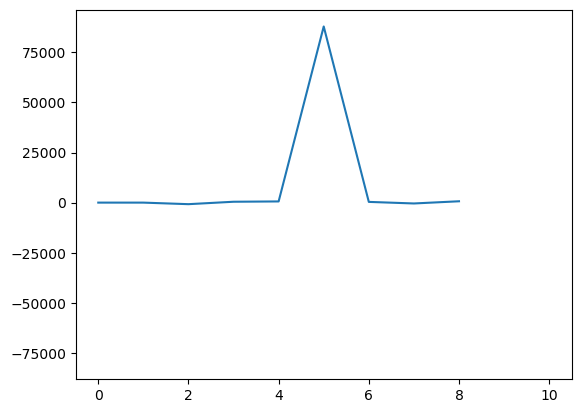

In [57]:
fake_df['value'].plot(); # Adding a semicolon removes useless legend

But if we apply the same function on a categorical column, it will return an error:

In [59]:
# Yields an error!
#df['country'].plot()

### The method ``value_counts()``

This method is very useful, it takes as input almost any Series and return a new Series which displays the number of occurrences for each elements.

In [61]:
fake_df['letter']

0     A
1     A
2     B
3     B
4     C
5     D
6     D
7     D
8     D
9     D
10    E
Name: letter, dtype: object

In [60]:
fake_df['letter'].value_counts()

letter
D    5
A    2
B    2
C    1
E    1
Name: count, dtype: int64

**>>>** Use the ``.value_counts()`` method to plot the "Country" Series.

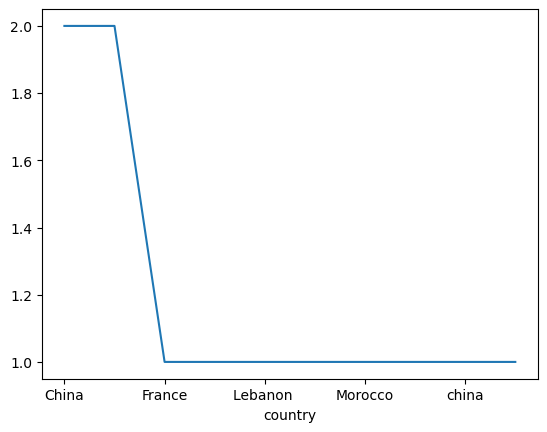

In [64]:
# Code here!
df['country'].value_counts().plot();

**>>>** This works, but it's not ideal. Check the [online documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) and give better arguments to the parameters of the `.plot()` method in order to display a useful graph. You're probably going to use the parameter "kind", and maybe "rot".

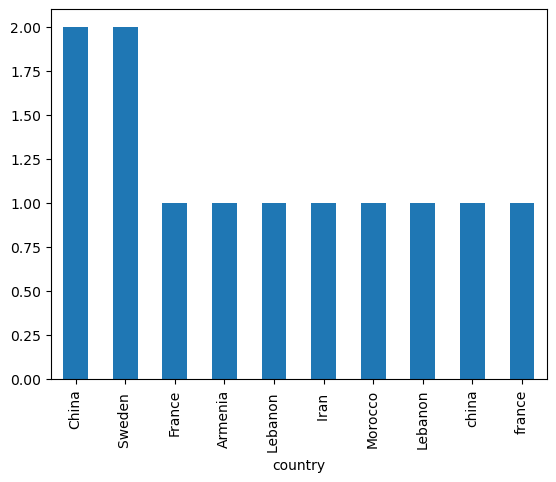

In [66]:
# code here!
df['country'].value_counts().plot(kind="bar");

### Country capitalization

As you can see some country names start with a capital letter, and some others are lower-case. Pandas provides many functions to work with strings. They are in a sub-library called "str". For example:

In [67]:
fake_df['letter'].str.lower()

0     a
1     a
2     b
3     b
4     c
5     d
6     d
7     d
8     d
9     d
10    e
Name: letter, dtype: object

In [68]:
fake_df['letter'].str.replace("D", "The function can also be used!")

0                                  A
1                                  A
2                                  B
3                                  B
4                                  C
5     The function can also be used!
6     The function can also be used!
7     The function can also be used!
8     The function can also be used!
9     The function can also be used!
10                                 E
Name: letter, dtype: object

**>>>** Capitalize the strings inside the Series "Country". When it's done, replace the old Series with the new one and plot the data again.

In [71]:
# Code here!
df['country'].str.capitalize().str.strip()

0       China
1       China
2      France
3     Armenia
4     Lebanon
5        Iran
6     Morocco
7     Lebanon
8       China
9      Sweden
10     Sweden
11     France
Name: country, dtype: object

In [72]:
# We're happy, let's modify the Series "Country"
df['country'] = df['country'].str.capitalize().str.strip()

In [ ]:
df.plot()

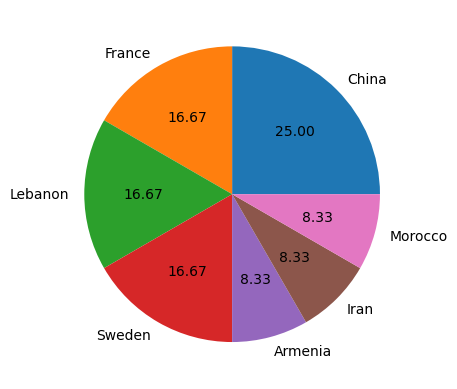

In [97]:
df['country'].value_counts().plot(kind='pie', ylabel='', autopct='%.2f');

## The Series "Pop_clean"

### Plotting data

You can plot a Series like this:

In [98]:
fake_df['value']

0         0.290
1        -3.319
2      -777.490
3       433.780
4       588.780
5     87881.060
6       359.920
7      -425.890
8       667.920
9           NaN
10   -79761.720
Name: value, dtype: float64

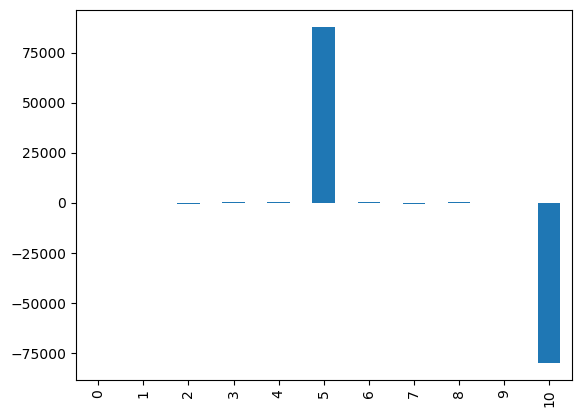

In [101]:
fake_df['value'].plot(kind='bar');

But the xticks are the index of our DataFrame. Let's plot some values as "y" and some categorical values as "x". In order to do this, you can use ``.plot()`` directly on a DataFrame, allowing you to manipulate multiple Series easily.

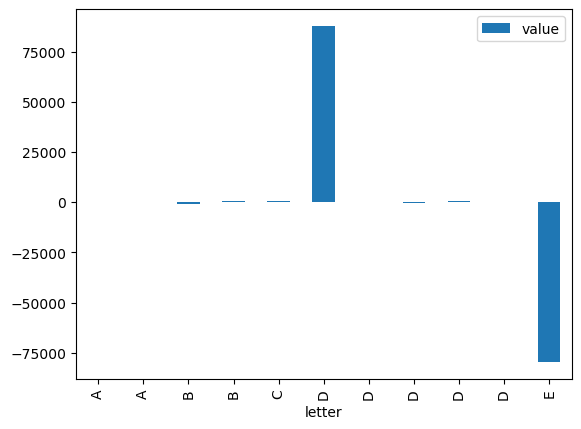

In [102]:
fake_df.plot(x='letter', y='value', kind='bar');

**>>>** Plot both the Series 'pop_clean' and 'country' on the same graph.

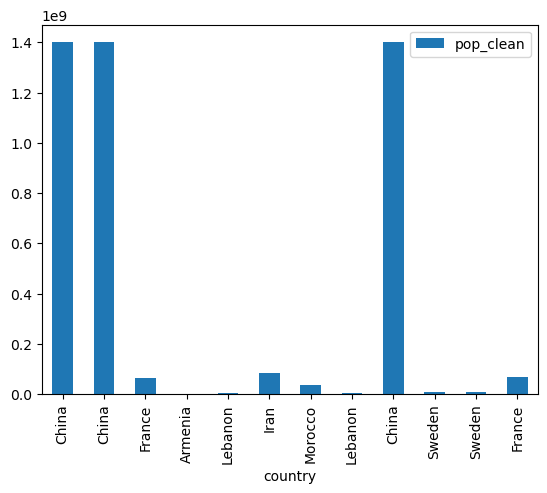

In [104]:
# Code here!
df.plot(x='country', y='pop_clean', kind='bar');

### Operations on numeric data

The Series **'value'** in *fake_df* and **'pop_clean'** in *df* are both numerical data. Meaning you can apply many different statistical functions on them:

In [105]:
fake_df['value']

0         0.290
1        -3.319
2      -777.490
3       433.780
4       588.780
5     87881.060
6       359.920
7      -425.890
8       667.920
9           NaN
10   -79761.720
Name: value, dtype: float64

In [106]:
fake_df['value'].mean()

896.3330999999991

In [107]:
fake_df['value'].median()

180.10500000000002

In [108]:
fake_df['value'].describe()

count       10.000000
mean       896.333100
std      39551.478304
min     -79761.720000
25%       -320.247250
50%        180.105000
75%        550.030000
max      87881.060000
Name: value, dtype: float64

**>>>** Have a look at basics statistics on the "pop_clean" data. You can use the function `.astype(int)` to convert the result to integers.

In [114]:
# Code here!
df['pop_clean'].describe()#.astype(int)

count              12.00
mean      374_136_670.33
std       619_248_645.31
min         2_800_000.00
25%         9_000_000.00
50%        51_920_022.00
75%       413_750_000.00
max     1_400_000_000.00
Name: pop_clean, dtype: float64

### Displaying large float numbers

When working with large float numbers, it might be useful to change the way Pandas display them. For example :

In [113]:
# We create a function that will add commas as thousands separator,
# and then replace_them with an underscore,
# also it only takes up to 2 digits now.
def thousands_separator(x):
    return '{:_.2f}'.format(x)
pd.set_option('display.float_format', thousands_separator)

## The "educ_years" Series

We can apply the method ``.sort_index()`` on a Series to reorganise the index, which is useful to better visualize results or to plot data.

In [115]:
fake_df['letter'].value_counts()

letter
D    5
A    2
B    2
C    1
E    1
Name: count, dtype: int64

In [116]:
fake_df['letter'].value_counts().sort_index()

letter
A    2
B    2
C    1
D    5
E    1
Name: count, dtype: int64

In [117]:
fake_df['letter'].value_counts().sort_index(ascending=False)

letter
E    1
D    5
C    1
B    2
A    2
Name: count, dtype: int64

**>>>** Let's take a closer look at the "educ_years" Series :
- Display basic statistics.
- Plot the "educ_years" Series using a "bar" graph.
- Now plot it using a "kde" (Kernel Density Estimator) graph.
- Use ``.value_counts()`` on the Series and plot the result.
- Make sure your xticks are ascendant, using the using the method ``.sort_index()`` on your Series.

In [119]:
# Code here!
df['educ_years'].describe()

count   12.00
mean     5.50
std      2.11
min      2.00
25%      4.00
50%      5.00
75%      6.25
max     10.00
Name: educ_years, dtype: float64

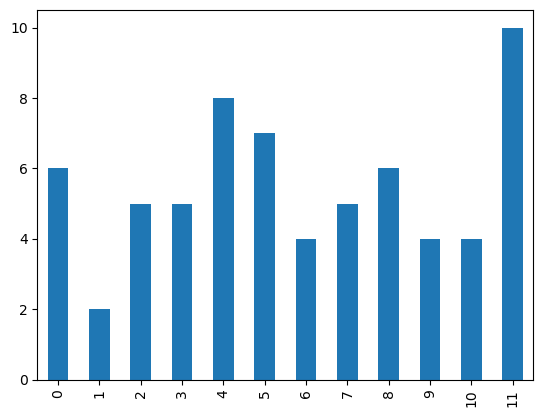

In [121]:
# Code here!
df['educ_years'].plot(kind='bar');

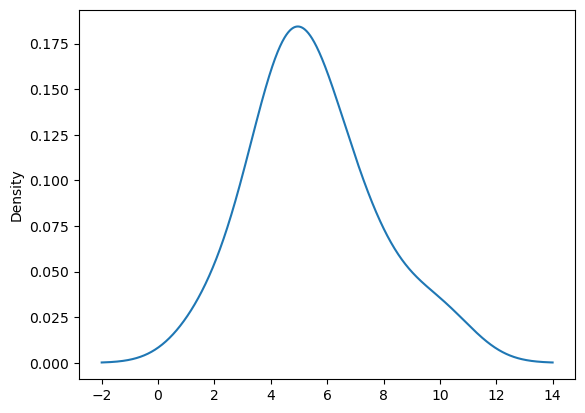

In [122]:
# Code here!
df['educ_years'].plot(kind='kde');

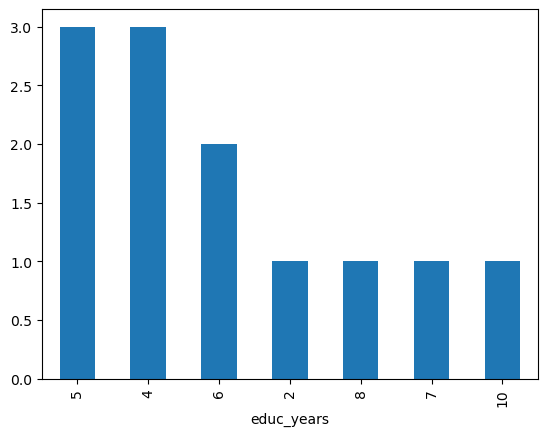

In [125]:
# Code here!
df['educ_years'].value_counts().plot(kind='bar');

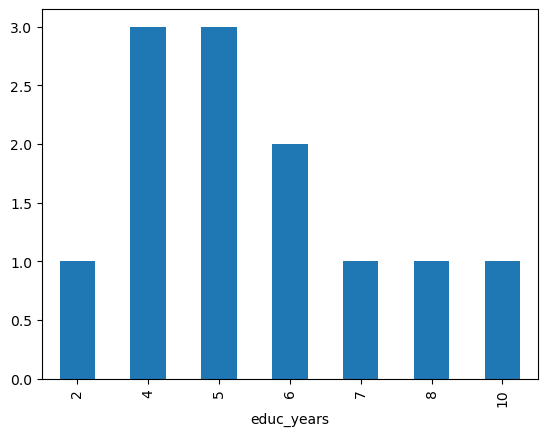

In [126]:
# Code here!
df['educ_years'].value_counts().sort_index().plot(kind='bar');

## The Series Salary

### Selecting data in Pandas : ``.iloc[]`` and ``.loc[]`` methods

The `.iloc[]` and ``.loc[]`` methods in Pandas are used for indexing and selecting data in DataFrames. They serve different purposes and work based on different indexing schemes:

#### The ``.iloc[]`` method (Integer Location)

``.iloc[]`` is primarily used for selecting data by integer position, which means you specify row and column positions numerically :

- It accepts integer-based indexing for both rows and columns.
- The indexing is zero-based, similar to Python lists.
- You can use integers, slices, lists, or boolean arrays to select data.

In [128]:
fake_df.head(1)

,letter,fruit,value,numbers_list,date,datetime
0,A,Apple,0.29,74-23-25,23h:45m:35s 24-Mar-1988,1988-03-24 23:45:35


In [129]:
fake_df.iloc[0]  # Select the first row
# Note that it returns a Series, not a DataFrame.

letter                                A
fruit                             Apple
value                              0.29
numbers_list                   74-23-25
date            23h:45m:35s 24-Mar-1988
datetime            1988-03-24 23:45:35
Name: 0, dtype: object

In [130]:
fake_df.iloc[2:5, 1:3]
# Returns a DataFrame because they are several Series.

,fruit,value
2,Banana,-777.49
3,NaN,433.78
4,Apple,588.78


In [131]:
fake_df.iloc[[0, 3, 5], [1, 2]]  # Select specific rows and columns by integer positions

,fruit,value
0,Apple,0.29
3,NaN,433.78
5,Orange,87_881.06


In [133]:
# Select specific rows and columns with boolean indexing
fake_df.iloc[[True, False, True, False, True, True, False, True, False, True, False], [False, True, True, False, False, True]]

,fruit,value,datetime
0,Apple,0.29,1988-03-24 23:45:35
2,Banana,-777.49,2023-10-01 12:51:43
4,Apple,588.78,2003-08-01 17:15:22
5,Orange,87_881.06,2012-02-25 17:42:20
7,Banana,-425.89,2012-12-12 11:07:57
9,Strawberry,NaN,1949-08-03 02:37:01


#### The ``.loc[]`` method (Label Location)

The method ``.iloc[]`` can sometimes be useful, but generally we use the ``.loc[]`` method which is very powerful. It allows us to select data by label or label-based conditions.

- It accepts label-based indexing for both rows and columns.
- Unlike most of the indexing in Python : the indexing is **inclusive on both ends** (i.e., slices include the specified labels).
- You can use labels, slices, lists, or boolean arrays to select data.
- You can filter using conditions.

In [134]:
fake_df.loc[0:3, 'fruit']

0     Apple
1     Apple
2    Banana
3       NaN
Name: fruit, dtype: object

In [135]:
fake_df.loc[1:2, ['fruit', 'datetime']]

,fruit,datetime
1,Apple,1978-04-09 09:57:31
2,Banana,2023-10-01 12:51:43


In [139]:
fake_df['value']

0          0.29
1         -3.32
2       -777.49
3        433.78
4        588.78
5     87_881.06
6        359.92
7       -425.89
8        667.92
9           NaN
10   -79_761.72
Name: value, dtype: float64

In [140]:
# Pandas returns a boolean Series when you make comparison
fake_df['value'] > 500

0     False
1     False
2     False
3     False
4      True
5      True
6     False
7     False
8      True
9     False
10    False
Name: value, dtype: bool

In [141]:
# You can use this boolean Series to filter your DataFrame using .loc[]
fake_df.loc[fake_df['value'] > 500]

,letter,fruit,value,numbers_list,date,datetime
4,C,Apple,588.78,58-1-97,17h:15m:22s 01-Aug-2003,2003-08-01 17:15:22
5,D,Orange,87_881.06,58-5-99,17h:42m:20s 25-Feb-2012,2012-02-25 17:42:20
8,D,Kiwi,667.92,45-62-96,09h:16m:12s 28-Dec-1982,1982-12-28 09:16:12


**>>>** Let's have a look at the "Salary" Series.

- Display basic statistics.
- Plot it.
- Choose a threshold , remove the outliers using ``.loc[]`` and compute the same stats.
- Generate a new graph without the outliers.

**TIP**: When using a hist graph, you can decide the numbers of "columns" using the "bins" parameter. Default is set to 10.

In [142]:
# Code here!
df['salary'].describe()

count          12.00
mean      448_291.67
std     1_436_065.20
min         4_000.00
25%         4_500.00
50%         6_000.00
75%        11_250.00
max     5_000_000.00
Name: salary, dtype: float64

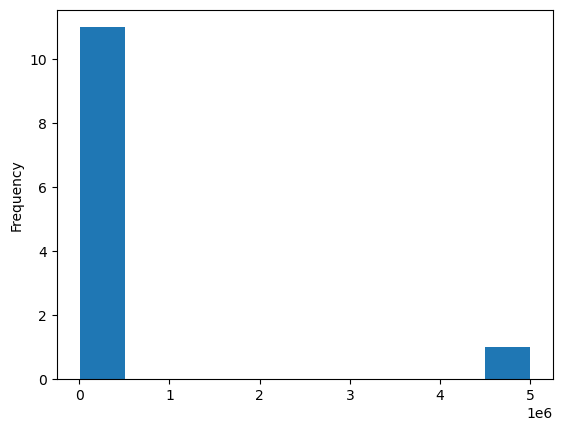

In [145]:
# Code here!
df['salary'].plot(kind='hist');

In [146]:
# Code here!
df['salary'].loc[df['salary'] < 100_000].describe()

count       10.00
mean     6_950.00
std      3_616.71
min      4_000.00
25%      4_500.00
50%      5_000.00
75%      9_250.00
max     15_000.00
Name: salary, dtype: float64

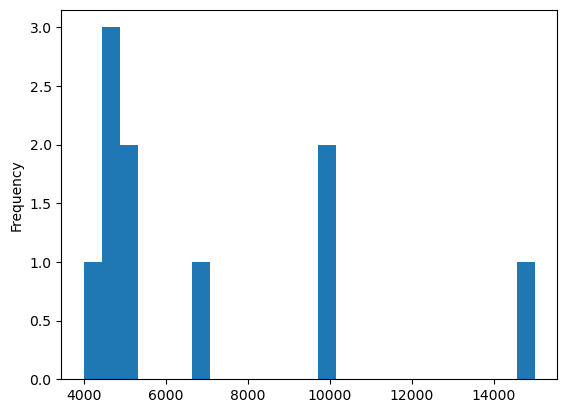

In [152]:
# Code here!
df['salary'].loc[df['salary'] < 100_000].plot(kind='hist', bins=25);

### Outliers : the thumb rule

Sometimes, when you process a huge amont of data and you need to remove the outliers, you can use a statistician thumb rule : an outlier is a value that is above (or below) the distribution mean plus (or minus) three times the standard variation.

In [153]:
fake_df['value'] # There are 2 outliers there

0          0.29
1         -3.32
2       -777.49
3        433.78
4        588.78
5     87_881.06
6        359.92
7       -425.89
8        667.92
9           NaN
10   -79_761.72
Name: value, dtype: float64

In [154]:
fake_df['value'].mean()

896.3330999999991

In [155]:
fake_df['value'].std()

39551.478304191114

In [156]:
# thumb rule for outliers : mean +/- 3 times the std
# Upper bound :
print(fake_df['value'].mean() + 3 * fake_df['value'].std())
# Lower bound :
print(fake_df['value'].mean() - 3 * fake_df['value'].std())

119550.76801257335
-117758.10181257334


However this "thumb rule" doesn't apply here as we don't have enough data. So let's just take the mean and add or remove the standard variation.

In [157]:
# our rule for outliers : mean +/- the std
# Upper bound :
print(fake_df['value'].mean() + fake_df['value'].std())
# Lower bound :
print(fake_df['value'].mean() - fake_df['value'].std())

40447.81140419111
-38655.14520419112


#### The .between() method

The ``.between()`` method allows us to create a boolean Series which returns ``True`` if the value is between the 2 arguments, and ``False`` if it's not the case.

In [158]:
fake_df['value'].between(-22, 1000)

0      True
1      True
2     False
3      True
4      True
5     False
6      True
7     False
8      True
9     False
10    False
Name: value, dtype: bool

In [159]:
# You can then filter your entire DataFrame based on that condition
fake_df.loc[fake_df['value'].between(-22, 1000)]

,letter,fruit,value,numbers_list,date,datetime
0,A,Apple,0.29,74-23-25,23h:45m:35s 24-Mar-1988,1988-03-24 23:45:35
1,A,Apple,-3.32,66-25-9,09h:57m:31s 09-Apr-1978,1978-04-09 09:57:31
3,B,NaN,433.78,86-66-90,14h:07m:35s 26-Jul-2015,2015-07-26 14:07:35
4,C,Apple,588.78,58-1-97,17h:15m:22s 01-Aug-2003,2003-08-01 17:15:22
6,D,Peach,359.92,87-21-72,00h:12m:44s 17-May-2008,2008-05-17 00:12:44
8,D,Kiwi,667.92,45-62-96,09h:16m:12s 28-Dec-1982,1982-12-28 09:16:12


In [160]:
# Let's apply our "outliers policy" on our dataframe:

fake_df.loc[fake_df['value'].between(
            fake_df['value'].mean() - fake_df['value'].std(), # lower bound
            fake_df['value'].mean() + fake_df['value'].std() # upper bound
                                     )]

,letter,fruit,value,numbers_list,date,datetime
0,A,Apple,0.29,74-23-25,23h:45m:35s 24-Mar-1988,1988-03-24 23:45:35
1,A,Apple,-3.32,66-25-9,09h:57m:31s 09-Apr-1978,1978-04-09 09:57:31
2,B,Banana,-777.49,46-11-40,12h:51m:43s 01-Oct-2023,2023-10-01 12:51:43
3,B,NaN,433.78,86-66-90,14h:07m:35s 26-Jul-2015,2015-07-26 14:07:35
4,C,Apple,588.78,58-1-97,17h:15m:22s 01-Aug-2003,2003-08-01 17:15:22
6,D,Peach,359.92,87-21-72,00h:12m:44s 17-May-2008,2008-05-17 00:12:44
7,D,Banana,-425.89,1-73-4,11h:07m:57s 12-Dec-2012,2012-12-12 11:07:57
8,D,Kiwi,667.92,45-62-96,09h:16m:12s 28-Dec-1982,1982-12-28 09:16:12


Note that our missing values in the column "value" have also disappeared.

### Creating a view from a DataFrame

Let's store the result in a new DataFrame, which will be a **view** of our original DataFrame, just like when we slice an array with Numpy.

In [161]:
clean_values_fake_df = fake_df.loc[fake_df['value'].between(
                            fake_df['value'].mean() - fake_df['value'].std() # lower bound
                          , fake_df['value'].mean() + fake_df['value'].std() # upper bound
                                             )]

In [162]:
clean_values_fake_df.head()

,letter,fruit,value,numbers_list,date,datetime
0,A,Apple,0.29,74-23-25,23h:45m:35s 24-Mar-1988,1988-03-24 23:45:35
1,A,Apple,-3.32,66-25-9,09h:57m:31s 09-Apr-1978,1978-04-09 09:57:31
2,B,Banana,-777.49,46-11-40,12h:51m:43s 01-Oct-2023,2023-10-01 12:51:43
3,B,NaN,433.78,86-66-90,14h:07m:35s 26-Jul-2015,2015-07-26 14:07:35
4,C,Apple,588.78,58-1-97,17h:15m:22s 01-Aug-2003,2003-08-01 17:15:22


**>>>** Create a new DataFrame called "salary_df" which will not contain the rows where the salary values are over a thresold.

In [168]:
df['salary'].mean() * 0.2

89658.33333333334

In [ ]:
# Code here!
df['salary'].loc[df['salary'] < 90_000] # simple way
df['salary'].loc[df['salary'].between(0, df['salary'].mean() * 0.2)]

In [191]:
# Don't get confused between Series and DataFrame!
salary_df = df.loc[df['salary'].between(0, df['salary'].mean() * 0.2)]

# Group By and Aggregations

## Group By


In data science, a "Groupby" is an operation that involves splitting a dataset into groups based on one or more criteria. It is a way to break down data into smaller, manageable pieces for analysis.

Once data are separated in different groups, we usually apply one or several functions on each different group.

## Aggregations


"Aggregations" refer to the process of applying a mathematical or statistical function to a set of data to obtain a single summary value. Aggregations typically involve operations like sum, mean, median, count, min, max, etc.

Aggregations are used to summarize and condense data, providing insights into the overall characteristics of a dataset or specific groups created using groupby.

## Exemples

Let's imagine we have a library with several books classified with their genre. We can group them and apply the function `.sum()` to check how many books we have for each different categories.

<img src="files/group_by-sum.jpg" width="90%" align="center">

But we could also apply the function `.mean()` to compute the average.

<img src="files/group_by-avg.jpg" width="100%" align="center">

[Source](https://learnsql.com/blog/group-by-in-sql-explained/)



## Performing GROUP BY on our datasets

### A simple Group By

We can create groupby objets without applying a function, and save it for later.

In [178]:
clean_values_fake_df.groupby('letter') # Data have been grouped by Letter

### Simple functions

#### ``.sum()``

In [179]:
# If we remove numeric_only=True, Pandas yield an error,
# because you can't apply this function on strings.
clean_values_fake_df.groupby('letter').sum(numeric_only=True)

,value
letter,
A,-3.03
B,-343.71
C,588.78
D,601.95


#### ``.count()``

In [182]:
# Let's use a count()
# here we don't need the parameter numeric_only=True
# because count() can be applied on any object.
clean_values_fake_df.groupby('letter').count()

,fruit,value,numbers_list,date,datetime
letter,,,,,
A,2,2,2,2,2
B,1,2,2,2,2
C,1,1,1,1,1
D,3,3,3,3,3


#### ``.mean()``

In [185]:
clean_values_fake_df.groupby('letter').mean(numeric_only=True)

,value
letter,
A,-1.51
B,-171.86
C,588.78
D,200.65


### The method ``.agg()``


The .agg() method in Pandas is used to perform aggregation operations on a DataFrame or Series.

We can specify one or more aggregation functions that we want to apply to the data. These functions can be built-in functions like ``sum()``, ``mean()``, ``min()``, ``max()``, or custom functions.

It can take strings arguments, lists or even dictionaries.

#### ``.agg()`` with one function

In [186]:
clean_values_fake_df.groupby('letter').agg('mean', numeric_only=True)

,value
letter,
A,-1.51
B,-171.86
C,588.78
D,200.65


#### ``.agg()`` with several functions

Here we took only the Series "value" from the grouped data, and apply three different functions to it.

In [188]:
clean_values_fake_df.groupby('letter')['value'].agg(['count', 'sum', 'mean'])

,count,sum,mean
letter,,,
A,2,-3.03,-1.51
B,2,-343.71,-171.86
C,1,588.78,588.78
D,3,601.95,200.65


#### ``.agg()`` with a dict of arguments

Passing a dictionnary of arguments allows us to better control the behavior of the aggregation function.

In [189]:
clean_values_fake_df.groupby('letter').agg({
        'value' : ['mean','median', 'max', 'min'],
        'fruit':  ['count']})

value                        fruit
          mean  median    max     min count
letter                                     
A        -1.51   -1.51   0.29   -3.32     2
B      -171.86 -171.86 433.78 -777.49     1
C       588.78  588.78 588.78  588.78     1
D       200.65  359.92 667.92 -425.89     3

**>>>** Let's find out if we can learn more about the participants of this survey. Using the previous "salary_df" we've created :

- Group by **age** and look at the max, the min, the count, and the average salary.
- Plot the average to better visualise.
- Group by **gender** and look at the max, the min, the count, and the average salary.
- Plot the average to better visualise.

In [193]:
salary_df.head(1)

,time,country,population,pop_clean,educ_years,salary,siblings,age_group,father_degree,mother_degree,size,gender,pets,sport,colour,show
0,2023/09/15 11:45:35 PM UTC+3,China,1.4 billion,1400000000,6,4500,0,23 - 27 years old,No diploma,No diploma,165,Man,"dog, cat, rabbit",tennis,red,Jimmy Fallon


In [200]:
# Code here!
# with a list
salary_df.groupby('age_group')['salary'].agg(['min', 'max', 'count', 'mean'])
# with a dict
# salary_df.groupby('age_group').agg({'salary': ['min', 'max', 'count', 'mean']})

,min,max,count,mean
age_group,,,,
18 - 22 years old,4000,4000,1,4_000.00
23 - 27 years old,4500,15000,7,7_714.29
31 - 34 years old,4500,4500,1,4_500.00
35 - 40 years old,7000,7000,1,7_000.00


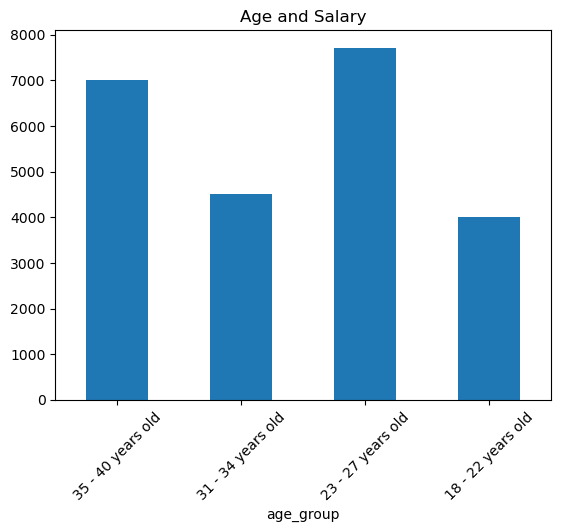

In [210]:
# Code here!
(
    salary_df.groupby('age_group')['salary']
             .mean()
             .sort_index(ascending=False)
             .plot(kind='bar', rot=45, title="Age and Salary")
);

In [211]:
# Code here!
salary_df.groupby('gender')['salary'].agg(['min', 'max', 'count', 'mean'])

,min,max,count,mean
gender,,,,
Man,4000,15000,8,6_187.50
Woman,10000,10000,2,10_000.00


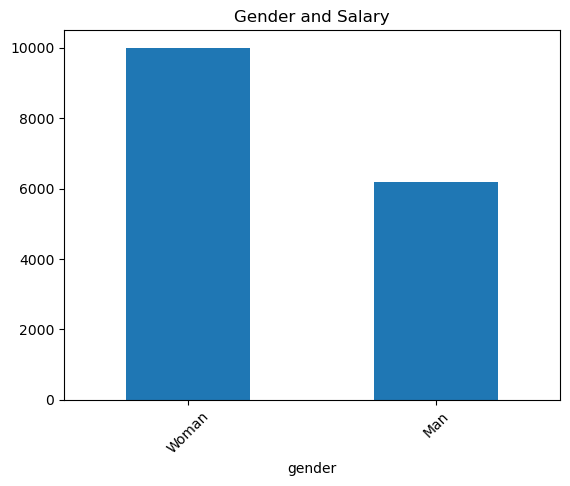

In [215]:
# Code here!
(
    salary_df.groupby('gender')['salary']
             .mean()
             .sort_index(ascending=False)
             .plot(kind='bar', rot=45, title="Gender and Salary")
);

# The Series "Siblings"

There is an error in the statement of the question. Can you spot it?

>How many siblings do you have, including yourself? Example: If you have 2 sisters and 1 brother, write 4.
>Include half-siblings - or your step-mother or step-father's children-  if you grew up with them.
>If you are an only child, enter 0.

We'll need to correct the answers before using it. To do so, we'll use `.map()`.

## The `.map()` method

The .map() method in Pandas is used to transform values in a Series based on a mapping or a provided function. It is a versatile and flexible way to apply custom transformations to the data. Here's how the .map() method works:


- If you provide a dictionary, it maps existing values in the Series to new values.
- If you provide a function, it applies the function to each element in the Series.

**Output**: The result is a new Series with transformed values based on the mapping or function.

Let's see some examples:

### Using a custom function with `.map()`

Once we've created a function, `.map()` will apply the function on each element and returns a new Series.

In [ ]:
# Let's define a function
def adds_1000(number):
    return number + 1000

In [ ]:
# Test
adds_1000(123.53)

In [ ]:
fake_df['value'].map(adds_1000)

### Using a dictionary with `.map()`

If we give a dictionary to `.map()`, it will map the different elements. If it finds the key, it will replace it with the corresponding value. Doing this is called "mapping".

In [ ]:
my_mapping_dict = {'A': 'Z',
                   'B': 'Y',
                   'C': 'X',
                   'D': 'W'}

fake_df['letter'].map(my_mapping_dict)

**>>>** Use `.map()` with a custom function to correct the "Siblings" Series.
- If number of siblings is 0, set it to 1. Otherwise leave the current number.
- When it's done replace the old Series with the new one.

**TIP**: If you made a mistake you can re-run all the cells from the top to get your df as it was originally. You can do it with "shift+enter" or using the "Run all above selected cells" in the run menu.

In [ ]:
# Code here!


In [ ]:
# Replace the old Series with the new one in this cell
# Code here!


# The Series "age_group"

**>>>** Plot the data using a bar graph.

In [ ]:
# Code here!


## The methods `.unique()` and `.nunique()`

### `.unique()` 

- The `.unique()` method is used to return an array of all the unique values present in a Series. In other words, it removes duplicate values and provides a list of unique values.

- It returns a new Series.

### `.nunique()` 

- The `.nunique()` method is used to count the number of distinct (unique) values in a Series.

- It returns the count of unique values.

In [ ]:
fake_df['letter'].unique()

In [ ]:
fake_df['letter'].nunique()

**>>>** Create a new Series called "age_mean" which will take the mean of each age group. There are several ways to do it:

- Use a dictionary and `.map()` (quick and simple way).
- Use `.unique()` to get all the unique strings, convert the elements in integer and compute the mean. You can either use a custom function or a comprehensive dictionary. To compute the mean, you can use `np.mean()` (more complicated).

In [ ]:
# Code here!


# The two Series about the Parents level of education

These are ordinal values, but they are stored as strings. Let's make things right.

In [ ]:
df['father_degree']

In [ ]:
df['mother_degree']

**>>>** Create new series with integer instead of strings.

- The two new Series will be named "father_el" and "mother_el" ("el" = "education level").
- Create a dictionary and use the `.map()` function to convert the strings to integer. The values will be :
    - If the string is Do not wish to answer / can't answer", replace it with `None`.
    - If it is "No diploma" then 0.
    - If it is "French baccalaureate" then 1,
    - If it is "Licence" then 2,
    - If it is "Master or PhD" then 3 
    
- At the end create a new Series named "parents_el" which will be the sum of "father_el" and "mother_el".

In [ ]:
# Code here!


# The Series "Size"

Let's say we want to know what is the average size of the people who took the survey. We first need to clean and convert those strings in integer.

In [ ]:
df['size']

**>>>** Write a custom function that clean the Series.

- Apply it using `.map()`
- Replace the old Series with the new one.

In [ ]:
# Code here!


# The Series "Gender"

**>>>** Create a new Series called "gender_int", and assign 1 if the gender is "Woman" and 0 if the gender is "Man".

In [ ]:
# Code here!


# The Series "Pets"

This Series has an issue. Several data are stored in the same string. Let's separate them.

In [ ]:
df['pets']

## The `.str` methods

Reminder : these methods allow us to use all kind of methods that can be applied on strings, but on Series.

In [ ]:
fake_df['fruit'].str[::-1].str.capitalize()

## The function `.str.split()`

It behaves almost the same way than the `.split()` function.

In [ ]:
fake_df['numbers_list'].str.split()

In [ ]:
fake_df['numbers_list'].str.split()[0][0]

In [ ]:
fake_df['numbers_list'].str.split('-')[0][0]

**>>>** To deal with this data, we'll need to: 

- Put all the strings in lower case.
- Find the right separator.
- Split our data in three different Series named "pet1", "pet2" and "pet3". In order to do this use the parameter "expand"

**TIP** : You can give a list of Series to a Dataframe. For example:

```Python
fake_df[['letter', 'value']]
```
It might be useful to create new Series in a single line of code.

In [ ]:
# Code here!


In [ ]:
# Use this cell to create the 3 Series "pet1", "pet2" and "pet3"
# Code here!


# Correlation

Let's see if we can find any correlation in our dataset.

## Prepare the dataset

First let's create a view of our df with only the variables of interest such as:

- 'pop_clean'
- 'educ_years'
- 'salary'
- 'siblings'
- 'size'
- 'gender_int'
- 'age_mean'
- 'parents_el'

### The method `.copy(deep=True)`

When we slice our DataFrame, it creates a **view**, not a **copy**. However you can force Pandas to create a distinct copy using `.copy(deep=True)`

In [ ]:
new_fake_df = fake_df.copy(deep=True)
new_fake_df['letter'] = "Z"
new_fake_df['letter']

In [ ]:
# Original df hasn't been modified
fake_df['letter']

**>>>** : Create a deep copy of our DataFrame named "corr_df" which contains only those columns of interest. Then apply the `.corr()` method on it.

In [ ]:
# Code here!


## An other way to deal with outliers.

We still have some outliers, especially inside the "salary column". There are countless ways to remove them, let's use `np.where()`.

### `np.where()`

This function provides a way to perform conditional operations on NumPy arrays and Pandas Series. It allows you to generate a new array or a new Series based on a specified condition. The general syntax for `np.where()` is:

```python
np.where(condition, value_is_true, value_if_false)
```

In [ ]:
# Exemple

np.where(fake_df['value'] > 0, 10, 0)

In [ ]:
# Exemple

# np.set_printoptions(precision=2, suppress=True) # useful to better visualize
np.where(fake_df['value'] > 0, 10, fake_df['value'] / 100)

In [ ]:
# Creating or replacing a Series

fake_df['new_value'] = np.where(fake_df['value'] > 0, 10, fake_df['value'] / 100)

**>>>** Replace the two outliers values we have in the "salary" Series with the median of that Series.

In [ ]:
# Code here!


In [ ]:
# Let's display the ne result
corr_df.corr()#.round(2)

# Correlation visualisations

When dealing with data, it's always a good thing to look at the data and not just numbers.

## Anscombe's quartet

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. ([wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet))


<img src="files/anscombe.png" width="70%" align="center">


| Property                                                  | Value             | Accuracy                                |
|-----------------------------------------------------------|-------------------|-----------------------------------------|
| Mean of x:                                                | 9                 | exact                                   |
| Sample variance of x:                                     | 11                | exact                                   |
| Mean of y:                                                | 7.50              | to 2 decimal places                     |
| Sample variance of y:                                     | 4.125             | ±0.003                                  |
| Correlation between x and y:                              | 0.816             | to 3 decimal places                     |
| Linear regression line:                                   | y = 3.00 + 0.500x | to 2 and 3 decimal places, respectively |
| Coefficient of determination of the linear regression: R² | 0.67              | to 2 decimal places                     |



## Seaborn and heatmap

Let's use Seaborn, a libray built on top of matplotlib.

In [ ]:
import seaborn as sns
sns.heatmap(corr_df.corr());

In [ ]:
# let's annot the heatmap and make it range from -1 to 1.
sns.heatmap(corr_df.corr(), vmin=-1, vmax=1, annot=True);

### The `sns.pairplot()` function

This function is used to create a matrix of scatterplots, also known as a pairwise scatter plot matrix. It's a valuable tool for visualizing the relationships between multiple variables (columns or Series) in a DataFrame.


In [ ]:
sns.pairplot(corr_df, diag_kind='kde', kind='reg', plot_kws={'color': 'red'});

In [ ]:
sns.lmplot(x='parents_el',
           y='salary',
           data=corr_df,
           fit_reg=True,
           line_kws={'color': 'red'}
          );

In [ ]:
sns.lmplot(x='gender_int',
           y='salary',
           data=corr_df,
           fit_reg=True,
           line_kws={'color': 'red'}
          );

# Advanced cleaning

Population, colour and TV Show can be cleaned using more complicated techniques.

## Population

In [ ]:
df['population']

**>>>** Write a custom function and use `.map()` to clean the column population.

In [ ]:
# Code here!


# The Series "sports"

**>>>** Use this [list](https://gist.githubusercontent.com/stefanoverna/371f009900bbe9ceec208f5dd1688737/raw/db7a90fa9e5dcb4ec22f4aef2774348fff7ccf69/gistfile1.txt) found on github, and the function `SequenceMatcher` from the `difflib` library to autocorrect sport names. Name your function "correct".

In [ ]:
# Code here!


# The Series "Colour"

**>>>** Find a list of colours on the internet and, just like the previous question, find a way to correct the data. You can reuse functions you've already written.

In [ ]:
df['colour']

In [ ]:
# Code here!


# TV Show

### Scrapping

**>>>** Use scrapping to create a list of TV Show. And then correct the data.

In [ ]:
# Code here!
